## Principal Component Analysis

PCA is one of **dimensionality reduction** methods (it's a linear, **unsupervised** method, _not_ a classifier).

- *Dimensionality reduction* - transforming data from high-dimension to low-dimension (used for data compresion, easier visualiaztion, explanatory reasons (it's difficult for humans to interpret high-dimension data), to avoid **curse of dimensionality**, to building interpretable model);
- *Curse of dimensionality* - set of all problems related to issues arising when working with high-dimension data sets;

PCA tries to **maximize the variance** among the new axes (so that new axes would explain most of the variation/information in the data and we'd preserve distances in the original space (e.g. if in original space we have two points that are very far away from each other we want them to also be far away in reduced space)).

#### Example

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


Data preprocessing - be sure to **standartize your data** (more on why [here](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html#sphx-glr-auto-examples-preprocessing-plot-scaling-importance-py) or [here](https://stats.stackexchange.com/questions/53/pca-on-correlation-or-covariance)). Possible ways:
- Use StandardScaler() (_pd.DataFrame(scaler.fit_transform(df), columns=iris.feature_names)_);
- _for name in df.columns: df[name] = (df[name]-df[name].mean())/df[name].std()_;
- Use _correlation_ matrix (not covariance) when dealing with matrices;

In [3]:
# using the correlation matrix is equivalent to standardizing the data
cor = df.corr() # instead of np.corrcoef(df.to_numpy().T) where we need to transpose the matrix df.corr() takes care of everything
cor

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


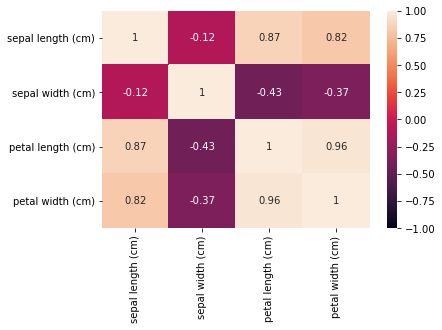

In [4]:
import seaborn as sns

heatmap = sns.heatmap(cor, annot=True, vmax=1, vmin=-1)

From the heatmap we see that the _Petal Length_ and _Petal Width_ are highly correlated (correlation = 0.96) so it might indicate that it's a good idea to use the linear combination of these two features.

In [5]:
# find the eigenvalue (D) and eigenvector (V) of the correlation matrix
D, V = np.linalg.eigh(cor) 
print(f'eigenvalues: {D}')
print(f'eigenvectors: \n {V}')

print('\nprincipal components:')
for i in range(0, len(D)):
    print('Feature %d : %2.3f'%(i+1, D[i]))

eigenvalues: [0.02071484 0.14675688 0.91403047 2.91849782]
eigenvectors: 
 [[ 0.26128628  0.71956635  0.37741762 -0.52106591]
 [-0.12350962 -0.24438178  0.92329566  0.26934744]
 [-0.80144925 -0.14212637  0.02449161 -0.5804131 ]
 [ 0.52359713 -0.63427274  0.06694199 -0.56485654]]

principal components:
Feature 1 : 0.021
Feature 2 : 0.147
Feature 3 : 0.914
Feature 4 : 2.918


In [6]:
# perform the linear transformation for the features
df_stnd = pd.DataFrame(StandardScaler().fit_transform(df))
X_new = df_stnd.dot(V)
X_new

,0,1,2,3
0,0.024168,0.127706,0.480027,2.264703
1,0.103007,0.234609,-0.674134,2.080961
2,0.028377,-0.044201,-0.341908,2.364229
3,-0.065956,-0.091290,-0.597395,2.299384
4,-0.035923,-0.015738,0.646835,2.389842
...,...,...,...,...
145,0.389257,-0.256274,0.386966,-1.870503
146,0.220192,0.026371,-0.896687,-1.564580
147,0.119171,-0.180178,0.269069,-1.521170
148,0.026129,-0.933395,1.011254,-1.372788


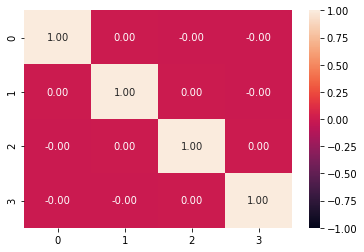

In [7]:
# The correlation between different features disappear
sns.heatmap(X_new.corr(), vmin = -1, vmax = 1, annot = True, fmt = '2.2f')
plt.show()

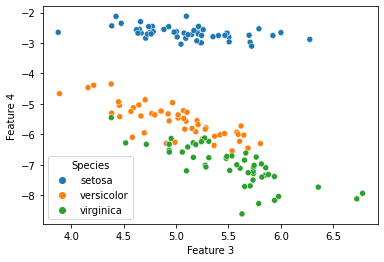

In [8]:
# perform dimensional reduction
# we're keeping only features 3 and 4 (chosen because of their highest PCs' values)
V_trun = V[:,2:4]
X_reduced = df.copy().dot(V_trun)
X_reduced['Species'] = iris.target
X_reduced.columns = ['Feature 3', 'Feature 4', 'Species']

for i, t in enumerate(iris.target_names):
    X_reduced['Species'].replace(i, t, inplace=True)
    
sns.scatterplot(data=X_reduced, x='Feature 3', y='Feature 4', hue='Species')
plt.show()

### Or we can use PCA function from sklearn:

In [9]:
from sklearn.decomposition import PCA

# NOTE that after dimensionality reduction axes (principal components) have no particular meaning - they are
# compositions of other features
pca = PCA(n_components = 2, random_state = 0)

df_stnd = pd.DataFrame(StandardScaler().fit_transform(df))

df_reduced = pca.fit(df_stnd).transform(df_stnd)
df_reduced = pd.DataFrame(df_reduced)
df_reduced.columns = ['Feature 1', 'Feature 2']
df_reduced['Species'] = iris.target

df_reduced

,Feature 1,Feature 2,Species
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0
...,...,...,...
145,1.870503,0.386966,2
146,1.564580,-0.896687,2
147,1.521170,0.269069,2
148,1.372788,1.011254,2


In [10]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762])

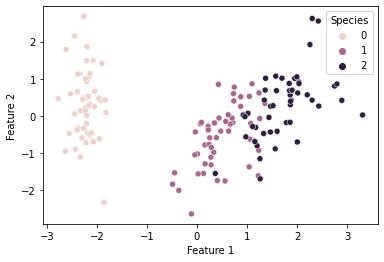

In [11]:
sns.scatterplot(data=df_reduced, x='Feature 1', y='Feature 2', hue='Species')
plt.show()

Dimesnions can be also reduced to 1:

In [12]:
pca1 = PCA(n_components = 1)

df_stnd1 = pd.DataFrame(StandardScaler().fit_transform(df))

df_reduced1 = pca1.fit_transform(df_stnd1)
df_reduced1 = pd.DataFrame(df_reduced1)
df_reduced1.columns = ['Feature 1']
df_reduced1['Species'] = iris.target

df_reduced1

,Feature 1,Species
0,-2.264703,0
1,-2.080961,0
2,-2.364229,0
3,-2.299384,0
4,-2.389842,0
...,...,...
145,1.870503,2
146,1.564580,2
147,1.521170,2
148,1.372788,2


In [13]:
pca1.explained_variance_ratio_

array([0.72962445])

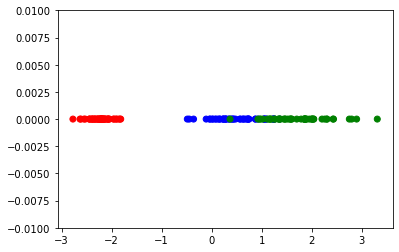

In [14]:
colors = {0:'red', 1: 'blue', 2:'green'}
feature_1 = df_reduced1['Feature 1']
plt.scatter(feature_1, y=np.zeros_like(feature_1), c=df_reduced1['Species'].map(colors))
plt.ylim(-0.01, 0.01)
plt.show()

#### Practical issues

- sensitive to the scale of measurements (e.g. height in mm). Can be fixed with data standartization;
- sensitive to outliers. Can be fixed with removing outliers before analysis;
- assumes linearity. It is advised to turn non-linear features or relationships between features into linear, using the standard methods such as log transforms;

More - https://onlinelibrary.wiley.com/doi/10.1111/evo.13835.

#### Extra

PCA vs linear regression: 
- There's no dependent variable in the PCA (it's unsupervised method, all the variables are treated the same) while for linear regression we define a dependent variable.
- For PCA the error squares are minimized **perpendicular** to the straight line (_orthogonal distance_) while for linear regression we want to minize the error between point and the straight line in the **y-direction** (which is the variable we're trying to predict).


Math behind explained in more detail - https://towardsdatascience.com/pca-clearly-explained-how-when-why-to-use-it-and-feature-importance-a-guide-in-python-7c274582c37e